In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA


In [4]:
X,y = make_blobs(n_samples= 1000, centers = 4, n_features=5, random_state = 102)

In [5]:
X.shape

(1000, 5)

In [13]:
pca = PCA(n_components= 2)
X_pca = pca.fit_transform(X)

/tmp/ipykernel_3578/601205313.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')


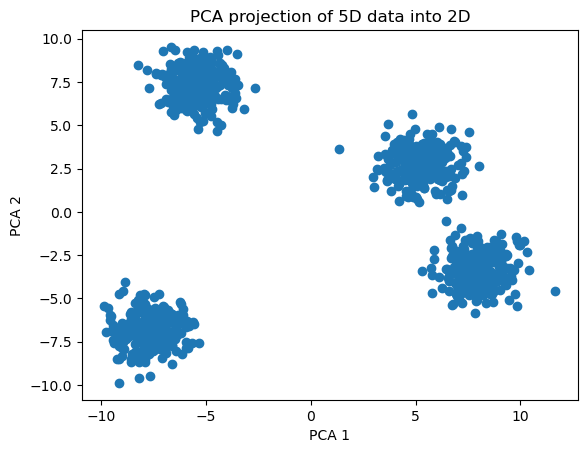

In [15]:
# Plot the first two PCA components
plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')
plt.title('PCA projection of 5D data into 2D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, _train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [17]:
from sklearn.cluster import KMeans

In [19]:
#Mannual process
#Elbow methos to select K value

In [24]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters = k, init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [25]:
wcss

[61198.110082573025,
 36600.494036183576,
 18627.932815085667,
 3259.011151859845,
 3117.474720830127,
 3031.8462040004297,
 2847.2178933645,
 2760.0817375317038,
 2675.5895262302647,
 2619.9787578196792]

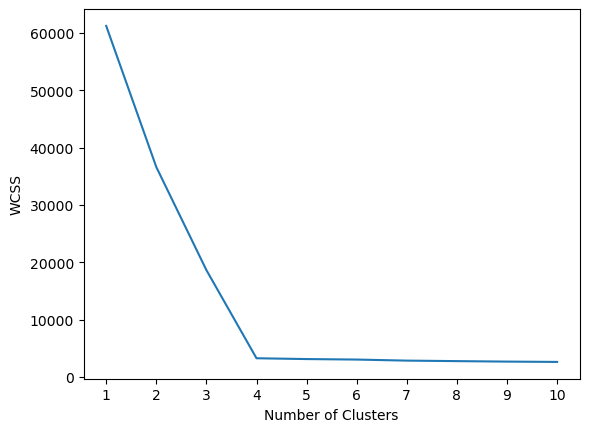

In [36]:
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [42]:
Kmeans = KMeans(n_clusters=3, init="k-means++")

In [45]:
y_labels = Kmeans.fit_predict(X_train)

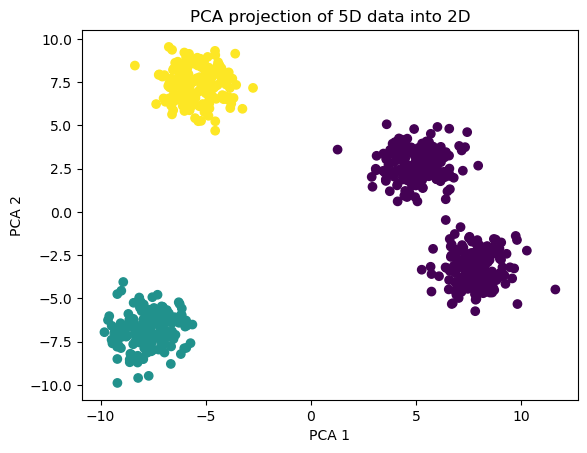

In [49]:
X_pca = pca.fit_transform(X_train)

plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis',c=y_labels)
plt.title('PCA projection of 5D data into 2D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [55]:
y_test_labels = kmeans.predict(X_test)

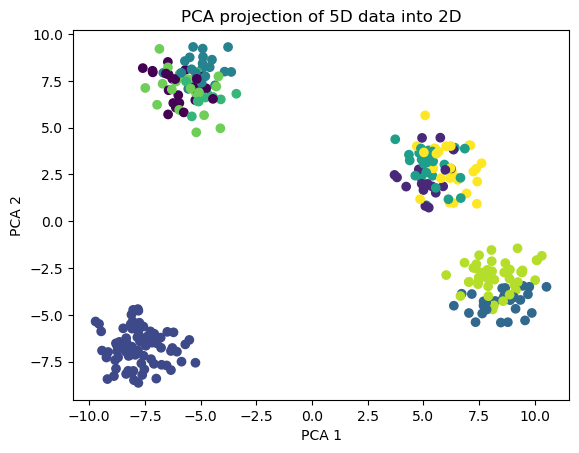

In [57]:
X_pca = pca.fit_transform(X_test)

plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis',c=y_test_labels)
plt.title('PCA projection of 5D data into 2D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [58]:
#Automatic process to find cluster


In [62]:
from kneed import KneeLocator

In [65]:
kl = KneeLocator(range(1,11), wcss, curve='convex',direction='decreasing')
kl.elbow

4

In [66]:
#performance metrics
#silhoutte score
from sklearn.metrics import silhouette_score

In [72]:
silhouette_coefficients=[]
for k in range (2,11):
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficients.append(score)

In [68]:
silhouette_coefficients

[0.5078689632765311,
 0.6733534984918896,
 0.7572355302332737,
 0.5996740082895432,
 0.45057610246272517,
 0.4557128652107128,
 0.300443739712107,
 0.162906063101452,
 0.29796810365778875]

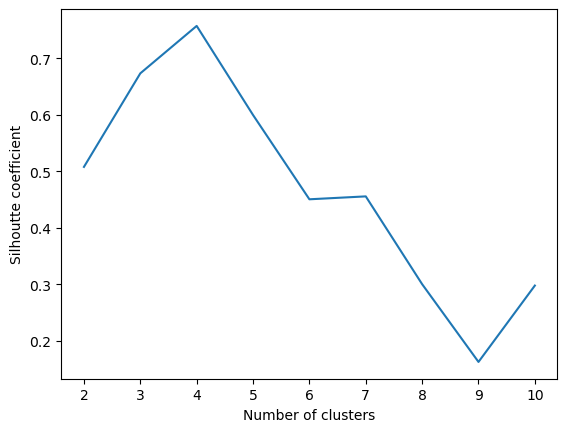

In [69]:
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhoutte coefficient")
plt.show()